# `AnnData` Conversion

The purpose of this notebook is to convert the cell table to a [`AnnData`](https://anndata.readthedocs.io/en/latest/index.html) Object.

`AnnData` stands for Annotated Data, and is a data structure well suited for single cell data. It is a multi-faceted object composed of matrices and DataFrames

In [51]:
from dask.distributed import Client
from ark.utils.data_utils import ConvertToAnnData, load_anndatas, AnnDataIterDataPipe
import os

In [9]:
Client(threads_per_worker = 2)

/Users/srivarra/.pyenv/versions/3.11.5/envs/ark/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 64118 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:64118/status,
Dashboard: http://127.0.0.1:64118/status,Workers: 5
Total threads: 10,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:64119,Workers: 5
Dashboard: http://127.0.0.1:64118/status,Total threads: 10
Started: Just now,Total memory: 64.00 GiB
Comm: tcp://127.0.0.1:64134,Total threads: 2
Dashboard: http://127.0.0.1:64141/status,Memory: 12.80 GiB
Nanny: tcp://127.0.0.1:64122,


In [10]:
base_dir = "../data/example_dataset/"

## 0. Download the Example Dataset

Here we are using the example data located in `/data/example_dataset/input_data`. To modify this notebook to run using your own data, simply change `base_dir` to point to your own sub-directory within the data folder.

* `base_dir`: the path to all of your imaging data. This directory will contain all of the data generated by this notebook, as well as the data previously generated by segmentation and cell clustering.

In [11]:
from ark.utils.example_dataset import get_example_dataset

get_example_dataset(dataset="post_clustering", save_dir= base_dir, overwrite_existing=True)

## 1. Convert the Cell Table to `AnnData` Objects

- `cell_table_path`: The path to the cell table that you wish to convert to `AnnData` objects. 
- `anndata_save_dir`: The directory where you would like to save the `AnnData` objects. This directory will be created if it does not already exist.

In [12]:
cell_table_path = os.path.join(base_dir, "segmentation/cell_table/cell_table_size_normalized_cell_labels.csv")
anndata_save_dir = os.path.join(base_dir, "anndata")

- `markers`: These are the names of the markers that you wish to extract from the Cell Table. You can specify each marker that you would like to use, or you may set it to `None` in order to grab all markers.
- `extra_obs_parameters`: These are the names of the extra columns in the Cell Table that you wish to extract. You can specify each parameter that you would like to use, or you may set it to `None` in order to grab all parameters.

In [13]:
# markers = ["CD14", "CD163", "CD20", "CD3", "CD31", "CD4", "CD45", "CD68", "CD8", "CK17", "Collagen1", "ECAD",
#               "Fibronectin", "GLUT1", "H3K27me3", "H3K9ac", "HLADR", "IDO", "Ki67", "PD1", "SMA", "Vim"]
markers = None

In [14]:
convert_to_anndata = ConvertToAnnData(cell_table_path, markers=markers, extra_obs_parameters=None)

In [15]:
fov_adata_paths = convert_to_anndata.convert_to_adata(save_dir=anndata_save_dir)

Load the `AnnData` objects for all FOVs. This will load them as an [`AnnCollection`](https://anndata.readthedocs.io/en/latest/generated/anndata.experimental.AnnCollection.html).

In [31]:
fovs_ac = load_anndatas(anndata_dir=anndata_save_dir, join_obs="inner", join_obsm="inner")

In [47]:
subset = fovs_ac[100:200]

We can view various components of the `AnnCollection` by accessing them by their names (`obs`, `obsm`, `var`, `var_names`, etc...)

`obs`: Here we can view properties of our observations, where in this case each observation is a cell segmentation. The properties for each cell include measurements such as `area`, `perimeter`, and categorical information like `cell_meta_cluster`.

In [48]:
fovs_ac.obs

,label,cell_size,area,eccentricity,major_axis_length,minor_axis_length,perimeter,convex_area,equivalent_diameter,major_minor_axis_ratio,perim_square_over_area,major_axis_equiv_diam_ratio,convex_hull_resid,centroid_dif,num_concavities,fov,cell_meta_cluster
fov0_1,1,34.0,34.0,0.699679,8.007260,5.720845,20.485281,36.0,6.579525,1.399664,12.342552,1.216997,0.055556,0.022207,0.0,fov0,CD4T
fov0_2,2,43.0,43.0,0.777362,9.629459,6.057447,23.899495,45.0,7.399277,1.589689,13.283392,1.301405,0.044444,0.018660,0.0,fov0,CD4T
fov0_3,3,51.0,51.0,0.768859,10.126542,6.475092,25.071068,52.0,8.058239,1.563922,12.324675,1.256669,0.019231,0.012862,0.0,fov0,CD4T
fov0_4,4,108.0,108.0,0.796695,15.501110,9.368588,40.384776,115.0,11.726460,1.654583,15.101205,1.321892,0.060870,0.021054,0.0,fov0,CD4T
fov0_5,5,134.0,134.0,0.870926,18.883940,9.279841,45.556349,138.0,13.061933,2.034942,15.487918,1.445723,0.028986,0.016876,0.0,fov0,CD4T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fov10_2790,2790,106.0,106.0,0.920955,19.253470,7.502476,43.935029,109.0,11.617375,2.566282,18.210252,1.657300,0.027523,0.004100,0.0,fov10,CD8T
fov10_2791,2791,149.0,149.0,0.915797,22.419015,9.004385,52.142136,155.0,13.773623,2.489789,18.246995,1.627677,0.038710,0.011306,0.0,fov10,Bcell
fov10_2792,2792,123.0,123.0,0.879332,18.668590,8.890138,44.727922,129.0,12.514330,2.099921,16.264935,1.491777,0.046512,0.017824,0.0,fov10,Bcell
fov10_2793,2793,75.0,75.0,0.875110,14.494926,7.014439,35.106602,81.0,9.772050,2.066441,16.432980,1.483305,0.074074,0.019377,0.0,fov10,Bcell


We can view the $x$ and $y$ centroids of each cell in our cohort by accessing the `obsm` attribute of the `AnnCollection`.

In [49]:
fovs_ac.obsm["spatial"]

,centroid_x,centroid_y
fov0_1,1.794118,4.411765
fov0_2,1.953488,69.953488
fov0_3,2.333333,94.235294
fov0_4,3.407407,238.185185
fov0_5,3.656716,263.201493
...,...,...
fov10_2790,1020.528302,781.462264
fov10_2791,1019.825503,808.718121
fov10_2792,1019.821138,826.487805
fov10_2793,1020.693333,868.373333


## 2. Basic Use Cases

We can utilize `AnnData` objects or `AnnCollections` in a similar way to a Pandas DataFrame. For example, we can filter the `AnnCollection` to only include cells that have a `cell_meta_cluster` label of `"CD4T"`.

In [70]:
fovs_ac_cd4t = fovs_ac[fovs_ac.obs["cell_meta_cluster"] == "CD4T"]
fovs_ac_cd4t.obs.df

,label,cell_size,area,eccentricity,major_axis_length,minor_axis_length,perimeter,convex_area,equivalent_diameter,major_minor_axis_ratio,perim_square_over_area,major_axis_equiv_diam_ratio,convex_hull_resid,centroid_dif,num_concavities,fov,cell_meta_cluster
fov0_1,1,34.0,34.0,0.699679,8.007260,5.720845,20.485281,36.0,6.579525,1.399664,12.342552,1.216997,0.055556,0.022207,0.0,fov0,CD4T
fov0_2,2,43.0,43.0,0.777362,9.629459,6.057447,23.899495,45.0,7.399277,1.589689,13.283392,1.301405,0.044444,0.018660,0.0,fov0,CD4T
fov0_3,3,51.0,51.0,0.768859,10.126542,6.475092,25.071068,52.0,8.058239,1.563922,12.324675,1.256669,0.019231,0.012862,0.0,fov0,CD4T
fov0_4,4,108.0,108.0,0.796695,15.501110,9.368588,40.384776,115.0,11.726460,1.654583,15.101205,1.321892,0.060870,0.021054,0.0,fov0,CD4T
fov0_5,5,134.0,134.0,0.870926,18.883940,9.279841,45.556349,138.0,13.061933,2.034942,15.487918,1.445723,0.028986,0.016876,0.0,fov0,CD4T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fov10_2785,2785,142.0,142.0,0.820592,18.748166,10.714859,49.006097,149.0,13.446190,1.749735,16.912659,1.394311,0.046980,0.018177,0.0,fov10,CD4T
fov10_2786,2786,82.0,82.0,0.808748,13.969363,8.216162,36.313708,88.0,10.217908,1.700230,16.081530,1.367145,0.068182,0.009740,0.0,fov10,CD4T
fov10_2787,2787,91.0,91.0,0.902932,16.917289,7.270758,38.727922,93.0,10.764051,2.326757,16.481890,1.571647,0.021505,0.008236,0.0,fov10,CD4T
fov10_2788,2788,170.0,170.0,0.899438,23.352031,10.205950,56.970563,181.0,14.712264,2.288080,19.092030,1.587249,0.060773,0.012740,0.0,fov10,CD4T


As another example, we can select just one FOV from the `AnnCollection` by filtering on the `fov` column of the `obs` DataFrame.

In [74]:
fov0_adata = fovs_ac[fovs_ac.obs["fov"] == "fov0"]

fov0_adata.obs.df

,label,cell_size,area,eccentricity,major_axis_length,minor_axis_length,perimeter,convex_area,equivalent_diameter,major_minor_axis_ratio,perim_square_over_area,major_axis_equiv_diam_ratio,convex_hull_resid,centroid_dif,num_concavities,fov,cell_meta_cluster
fov0_1,1,34.0,34.0,0.699679,8.007260,5.720845,20.485281,36.0,6.579525,1.399664,12.342552,1.216997,0.055556,0.022207,0.0,fov0,CD4T
fov0_2,2,43.0,43.0,0.777362,9.629459,6.057447,23.899495,45.0,7.399277,1.589689,13.283392,1.301405,0.044444,0.018660,0.0,fov0,CD4T
fov0_3,3,51.0,51.0,0.768859,10.126542,6.475092,25.071068,52.0,8.058239,1.563922,12.324675,1.256669,0.019231,0.012862,0.0,fov0,CD4T
fov0_4,4,108.0,108.0,0.796695,15.501110,9.368588,40.384776,115.0,11.726460,1.654583,15.101205,1.321892,0.060870,0.021054,0.0,fov0,CD4T
fov0_5,5,134.0,134.0,0.870926,18.883940,9.279841,45.556349,138.0,13.061933,2.034942,15.487918,1.445723,0.028986,0.016876,0.0,fov0,CD4T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fov0_665,665,141.0,141.0,0.822785,17.971267,10.214027,46.763456,151.0,13.398760,1.759469,15.509367,1.341263,0.066225,0.013487,0.0,fov0,CD4T
fov0_666,666,84.0,84.0,0.737387,12.794899,8.642579,33.899495,89.0,10.341766,1.480449,13.680664,1.237206,0.056180,0.008697,0.0,fov0,CD4T
fov0_667,667,161.0,161.0,0.875925,21.060249,10.160460,52.556349,175.0,14.317527,2.072765,17.156334,1.470942,0.080000,0.018782,0.0,fov0,Bcell
fov0_668,668,34.0,34.0,0.641350,7.787536,5.974973,20.863961,37.0,6.579525,1.303359,12.803084,1.183602,0.081081,0.030461,0.0,fov0,CD4T


## 3. Dataloaders

[`torchdata`](https://pytorch.org/data/beta/index.html) provides us the ability to construct various dataloaders, datapipes and apply functions or models to them, one FOV at a time.

In [75]:
from torchdata.dataloader2.dataloader2 import DataLoader2

In [76]:
adata_ip = AnnDataIterDataPipe(fovs=fovs_ac)

In this example of we construct a TorchData `IterDataPipe` with the AnnData Objects of each FOV, and then we apply a function to each FOV contained in this `IterDataPipe`.

In [77]:
def filter_adata_by_cluster(adata, cluster):
    return adata[adata.obs["cell_meta_cluster"] == cluster]

In [80]:
fovs_ac_cd4t_iter = adata_ip.map(lambda fov: filter_adata_by_cluster(fov, "CD4T"))

We can then create a DataLoader from this `IterDataPipe` and iterate over it.

In [82]:
fovs_ac_cd4t_dl = DataLoader2(fovs_ac_cd4t_iter)

In [83]:
for fov in fovs_ac_cd4t_dl:
    print(fov)

View of AnnData object with n_obs × n_vars = 221 × 22
    obs: 'label', 'cell_size', 'area', 'eccentricity', 'major_axis_length', 'minor_axis_length', 'perimeter', 'convex_area', 'equivalent_diameter', 'major_minor_axis_ratio', 'perim_square_over_area', 'major_axis_equiv_diam_ratio', 'convex_hull_resid', 'centroid_dif', 'num_concavities', 'fov', 'cell_meta_cluster'
    obsm: 'spatial'
View of AnnData object with n_obs × n_vars = 47 × 22
    obs: 'label', 'cell_size', 'area', 'eccentricity', 'major_axis_length', 'minor_axis_length', 'perimeter', 'convex_area', 'equivalent_diameter', 'major_minor_axis_ratio', 'perim_square_over_area', 'major_axis_equiv_diam_ratio', 'convex_hull_resid', 'centroid_dif', 'num_concavities', 'fov', 'cell_meta_cluster'
    obsm: 'spatial'
View of AnnData object with n_obs × n_vars = 3 × 22
    obs: 'label', 'cell_size', 'area', 'eccentricity', 'major_axis_length', 'minor_axis_length', 'perimeter', 'convex_area', 'equivalent_diameter', 'major_minor_axis_ratio',

We can chain together multiple `IterDataPipes` to create a more complex pipeline. In this example, we first filter the `AnnCollection` to only include cells that have a `cell_meta_cluster` label of `"CD4T"`, and then we filter the `AnnCollection` to only include cells which are above a certain area threshold.

In [85]:
fovs_ac_cd4t_large_cells = fovs_ac_cd4t_iter.map(lambda fov: fov[fov.obs["area"] > 100])

In [86]:
from torchdata.datapipes.utils import to_graph

We can visualize the pipeline that we have constructed.

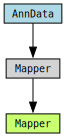

In [88]:
to_graph(fovs_ac_cd4t_large_cells)

And just like before, we can construct a DataLoader from this `IterDataPipe` and iterate over it efficiently on a FOV by FOV basis.

In [89]:
fovs_ac_cd4t_large_cells_dl = DataLoader2(fovs_ac_cd4t_large_cells)